<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/210520_xor_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def rand(size, a=0, b=1):
    return (b - a) * np.random.random(size) + a

In [20]:
npoints = 100
data1 = np.array([
                  rand(npoints, 1.5, 2.0), 
                  rand(npoints, 1.5, 2.0)
            ]).T
data1_label = np.ones(len(data1))
data3 = np.array([
                  rand(npoints, 0, 0.5), 
                  rand(npoints, 0, 0.5)
            ]).T
data3_label = np.ones(len(data3))
data2 = np.array([
                  rand(npoints, 1.5, 2.0), 
                  rand(npoints, 0, 0.5)
            ]).T
data2_label = np.ones(len(data2)) * 2   
data4 = np.array([
                  rand(npoints, 0, 0.5), 
                  rand(npoints, 1.5, 2.0)
            ]).T
data4_label = np.ones(len(data4)) * 2
X = np.concatenate((data1, data3, data2, data4)) 
y = np.concatenate((data1_label, data3_label, data2_label, data4_label))
data_df = pd.DataFrame({
    "x": X[:, 0],
    "y": X[:, 1],
    "label": y
})

Text(0.25, 2.25, '4')

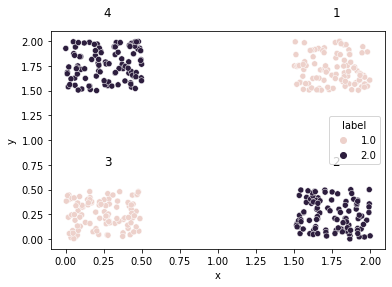

In [21]:
fig, ax = plt.subplots()
sns.scatterplot(x="x", y="y", data=data_df, hue="label", ax=ax)
ax.text(1.75, 2.25, "1", fontsize=12)
ax.text(1.75, 0.75, "2", fontsize=12)
ax.text(0.25, 0.75, "3", fontsize=12)
ax.text(0.25, 2.25, "4", fontsize=12)

In [42]:
def neuron(W, bias):
    def f(X):
        return np.maximum(np.dot(W, X.T)+bias, 0)
    return f

In [83]:
and_neuron = neuron(
    W= np.array([
                [0.5, 0.5]
    ]), bias=-1.25
)
or_neuron = neuron(
    W=np.array([
                [0.5, 0.5]
    ]), bias=-0.75
)
nand_neuron = neuron(
    W=np.array([
                [-0.5, -0.5]
    ]),
    bias=1.25
)

In [72]:
nand_neuron(data1)[0]

(100,)

In [78]:

data1.shape

(100, 2)

In [76]:

np.stack(
    (nand_neuron(data1)[0],
        or_neuron(data2)[0]
)).shape


(2, 100)

In [102]:
def xor_neuron(X):
    and_neuron = neuron(
            W= np.array([
                [0.5, 0.5]]), bias=0.25)
    return and_neuron(
        np.stack(
            (nand_neuron(X)[0],
             or_neuron(X)[0]
             )).T
    )

In [52]:
def check_activation(neuron, label):
    plt.title(f"activation of {label} neuron")
    plt.scatter(np.ones(npoints), neuron(data1), label="data1")
    plt.scatter(np.ones(npoints)*1.1, neuron(data2), label="data2")
    plt.scatter(np.ones(npoints)*1.2, neuron(data3), label="data3")
    plt.scatter(np.ones(npoints)*1.3, neuron(data4), label="data4")
    plt.legend()

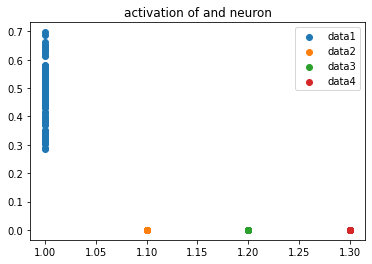

In [53]:
check_activation(and_neuron, "and")

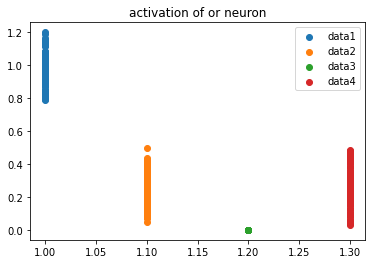

In [54]:
check_activation(or_neuron, "or")

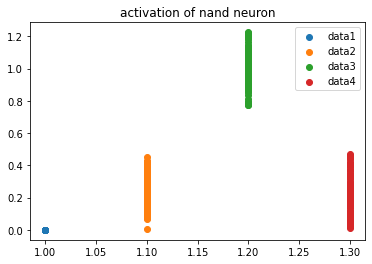

In [84]:
check_activation(nand_neuron, "nand")

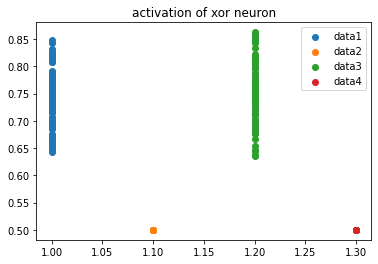

In [103]:
check_activation(xor_neuron, "xor")